In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd

# Lab 3

## Problem 1

### (A)

Mean: 11.998524980617836 	 Stdev: 0.4063943575689874 	 Num: 100008


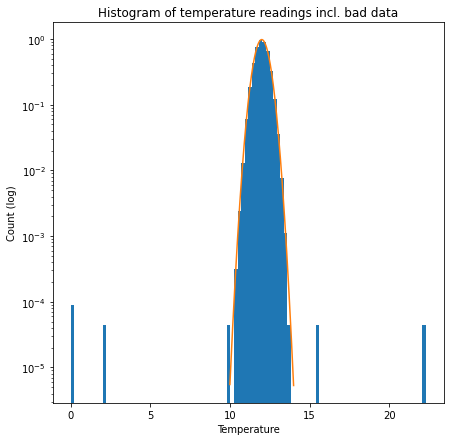

In [2]:
d = np.append(stats.norm.rvs(loc=12, scale=0.4, size=100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])

mean = d.mean()
stdev = d.std()
count = d.size
print(f"Mean: {mean} \t Stdev: {stdev} \t Num: {count}")

background = stats.norm(loc=mean, scale=stdev)

fig, ax = plt.subplots(1,1, figsize=(7,7))
ax.set_yscale('log')
ax.hist(d, 100, density=True)

x = np.linspace(10, 14, 1000)
ax.plot(x, background.pdf(x));
ax.set_title("Histogram of temperature readings incl. bad data")
ax.set_xlabel("Temperature")
ax.set_ylabel("Count (log)");

We will consider a reading an outlier and discard it if there is less than a 50% probability of an event that far or further from the mean occuring in 100,008 trials, assuming a Gaussian background with mean 11.999 and standard deviation 0.4073 (as calculated above). 

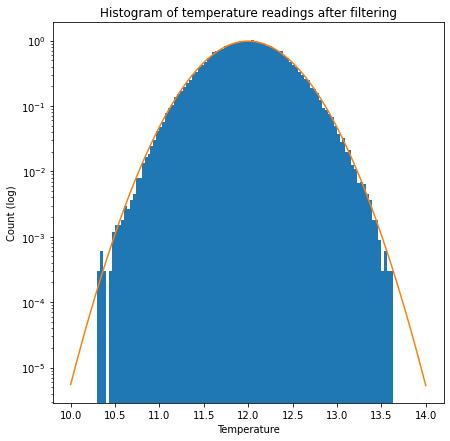

In [3]:
threshold = 0.5

single_probs = 2 * stats.norm(scale=stdev).sf(np.abs(d - 12)) # multiply by 2 to get both tails
trials_probs = count * single_probs # standard trials factor approx
valid_readings = (trials_probs > threshold).nonzero() # indices of valid data
d_filtered = d[valid_readings]

fig, ax = plt.subplots(1,1, figsize=(7,7))
ax.set_yscale('log')
ax.hist(d_filtered, 100, density=True)
x = np.linspace(10, 14, 1000)
ax.plot(x, background.pdf(x));
ax.set_title("Histogram of temperature readings after filtering")
ax.set_xlabel("Temperature")
ax.set_ylabel("Count (log)");

We can find the values that were excluded as follows.

In [4]:
excl_indices = np.setdiff1d(np.arange(0,d.size), valid_readings)
excl_values = d[excl_indices]
pd.DataFrame({
    "Index": excl_indices,
    "Value": excl_values
})

,Index,Value
0,100000,10.0
1,100002,2.1
2,100003,0.0
3,100004,0.0
4,100005,15.6
5,100006,22.3


We see that there are seven dropped values, six of which have indices greater than 99,999 and are thus part of our artificial "junk data", and one of which is part of the real data. Hence, our truth table is as follows.

In [5]:
pd.DataFrame(
    [[99999, 2],
     [1,      6]],
    ["Allowed", "Discarded"],
    ["Real", "Junk"]
)

,Real,Junk
Allowed,99999,2
Discarded,1,6


### (B) 

The higher the threshold, the more valid data we will omit. In this case, our threshold was 0.5, meaning we threw away any data point which had less than a 50% chance of appearing in our dataset given our assumed distribution, so there is roughly a 50% chance of us omitting a real datapoint. In general, for any threshold, we could calculate the probability of a random value drawn from our background distribution exceeding the threshold, and then multiply that probability by the number of data points to get the expected number of good points that we will discard.

### (C)

As you can see from the truth table, our test allowed two bad values through. In general, higher thresholds will omit more bad values, however since one of the bad values in this case (12.7) is less than two sigma off of the mean, it is essentially impossible to exclude it without omitting a substantial portion of our real data as well.

## Problem 2

### (A)

We want to know how far a star would have to move between measurements so that the probability of it moving that far or further assuming the null hypothesis (i.e. our Gaussian background) corresponds to 5 sigma.

### (B)

We know that if the components of a 2D vector are Gaussian distributed with mean 0 and standard deviation $s$, then the length of the vector will be Rayleigh distributed with scale $s$. In this case $s = 1$, so the background distribution for the magnitude of the displacement will be as shown below. To calculate the 5 sigma significance threshold, we need to integrate this pdf in to the left from infinity until the cumulative probability is 1 in 3.5 million.

Text(0, 0.5, 'Probability density')

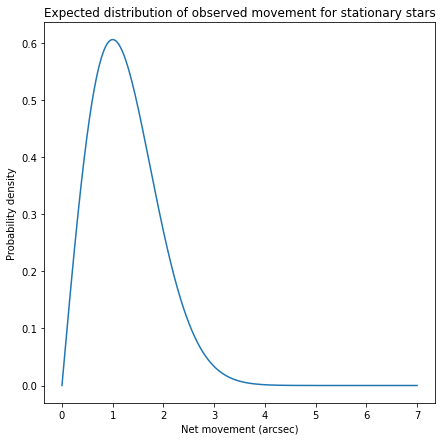

In [6]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
x = np.linspace(0,7,1000)
ax.plot(x, stats.rayleigh.pdf(x))
ax.set_title("Expected distribution of observed movement for stationary stars")
ax.set_xlabel("Net movement (arcsec)")
ax.set_ylabel("Probability density")

### (C)

Doing the calculation described above, we find that the movement threshold for a 5 sigma significance is 5.5 arcseconds.

In [7]:
threshold = stats.rayleigh.isf(stats.norm.sf(5))
print(f"5 sigma threshold: {threshold} arcsec")

5 sigma threshold: 5.489079776062419 arcsec


## Problem 3

### (A)

We what to know what is the probability of observing 6800 cosmic rays or fewer over a 120 hour observing period, assuming we were looking in a region of the sky _not_ blocked by the moon that thus followed our expected background of 1 event per minute.

### (B)

Since we are counting independent events occuring at a fixed rate, our background distribution will be Poisson. In particular, if we expect 1 event per minute, then the expected mean number of observations over a 120 hour period is 7200. To find the significance we thus need to take the sum of a Poisson distribution with mean 7200 from 0 to 6800.

In [8]:
prob = stats.poisson.cdf(6800, mu=7200)
sigma = stats.norm.isf(prob)
print(f"{prob} \t {sigma} sigma")

1.0133280183917768e-06 	 4.750747965777188 sigma


### (C)

Doing the sum described above, we find a significance of 4.7 sigma.